<a href="https://colab.research.google.com/github/jonatansg/CEIABD/blob/main/Tarea_Laberinto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Se desarrollará un programa en Python que recorra un laberinto (generado por algoritmo backtraking) usando el método recursivo de recorrido en profundidad.

El laberinto estará representado por un array bidimensional de 101x101 llamado maze e inicializado a cero (blanco).

La solución estará en la posición maze[100,99]=3 (verde) y se comenzará en la posición maze[1,1]=2 (naranja). Los bordes de maze se rellerán con 1 (gris).

Para realizar el recorrido en profundidad de forma iterativa se usa la estructura de PILA
(LIFO).

## **Ejercicio alojado en Github:**

# **1.2 Funcionamiento correcto del código.**

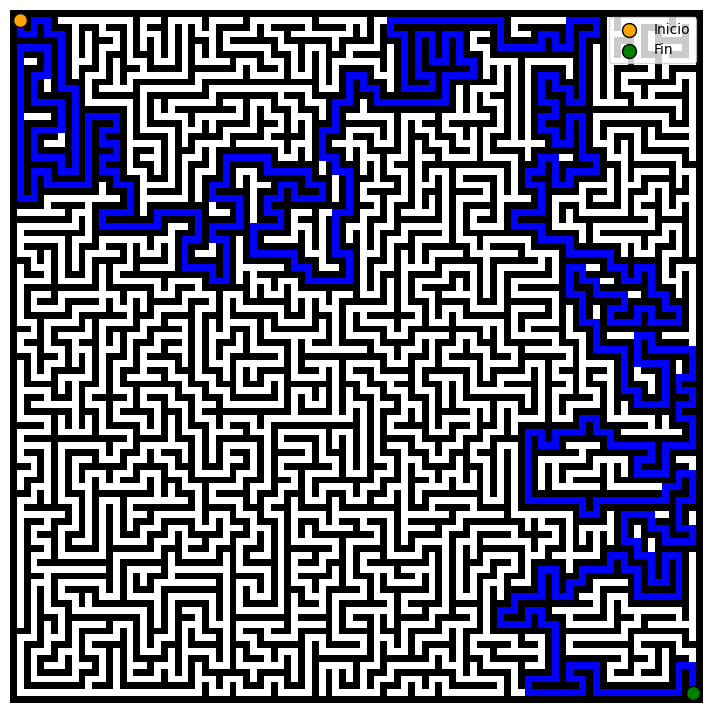

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import sys

# Aumentar el límite de recursión
sys.setrecursionlimit(10**6)

# Dimensiones del laberinto
n = 101  # Tamaño del laberinto (101x101)

# Crear el laberinto con paredes (1) y caminos (0)
maze = np.ones((n, n), dtype=int)

# Movimiento en las direcciones arriba, abajo, izquierda, derecha
movements = [(-2, 0), (2, 0), (0, -2), (0, 2)]

# Función para verificar si la celda está dentro del laberinto y es una pared
def is_valid(x, y):
    return 0 <= x < n and 0 <= y < n and maze[x, y] == 1

# Algoritmo de backtracking sin recursión para generar el laberinto
def generate_maze(x, y):
    # Crear una pila y añadir la celda inicial
    stack = [(x, y)]
    maze[x, y] = 0  # Marcar la celda inicial como camino

    while stack:
        # Obtener la posición actual
        x, y = stack[-1]

        # Mezclar direcciones para un laberinto aleatorio
        random.shuffle(movements)
        moved = False

        for dx, dy in movements:
            nx, ny = x + dx, y + dy
            # Comprobar si el próximo movimiento es válido
            if is_valid(nx, ny):
                # Romper la pared intermedia
                maze[x + dx // 2, y + dy // 2] = 0
                # Marcar la nueva celda como camino y añadirla a la pila
                maze[nx, ny] = 0
                stack.append((nx, ny))
                moved = True
                break

        # Si no hay movimientos posibles, retroceder en la pila
        if not moved:
            stack.pop()

# Inicializar el laberinto en una posición de inicio
start_x, start_y = 1, 1
generate_maze(start_x, start_y)

# Posiciones de inicio y fin
start = (1, 1)
goal = (99, 99)

# Movimientos en las direcciones arriba, abajo, izquierda, derecha
movements_dfs = [(-1, 0), (1, 0), (0, -1), (0, 1)]

# Función recursiva para realizar la búsqueda en profundidad (DFS)
def dfs_recursive(x, y, goal, path):
    # Si hemos alcanzado la meta, devolvemos True
    if (x, y) == goal:
        path.append((x, y))
        return True

    # Si la celda no es válida, regresamos
    if not (0 <= x < n and 0 <= y < n) or maze[x, y] != 0:
        return False

    # Marcar la celda como parte del camino
    maze[x, y] = 2  # Marcamos el camino (camino recorridos)

    # Intentar cada movimiento
    for dx, dy in movements_dfs:
        if dfs_recursive(x + dx, y + dy, goal, path):
            path.append((x, y))  # Agregar al camino si encontramos la meta
            return True

    # Desmarcar la celda si no encontramos la meta
    maze[x, y] = 0  # Volver a marcar como camino si no se encuentra el objetivo
    return False

# Inicializar el camino
path = []
dfs_recursive(start[0], start[1], goal, path)

# Marcar el camino encontrado en el laberinto
for (x, y) in path:
    maze[x, y] = 3  # Marcar el camino encontrado

# Visualizar el laberinto y el camino
plt.figure(figsize=(9, 9))

# Crear un mapa de colores personalizado
color_map = np.ones((n, n, 3), dtype=float)  # Crear un mapa RGB
color_map[maze == 1] = [0, 0, 0]    # Paredes en negro
color_map[maze == 0] = [1, 1, 1]    # Caminos en blanco
color_map[maze == 3] = [0, 0, 1]    # Camino encontrado en azul

# Mostrar el laberinto
plt.imshow(color_map)
plt.axis("off")

# Marcar el punto de inicio en naranja y el punto de fin en verde
plt.scatter(start[1], start[0], c='orange', s=100, edgecolors='black', label="Inicio")  # Inicio
plt.scatter(goal[1], goal[0], c='green', s=100, edgecolors='black', label="Fin")  # Fin

plt.legend(loc="upper right")
plt.show()


# **1.3 Explicación del funcionamiento y estructuras creadas.**


Voy a explicar el funcionamiento de cada parte del código, junto con las estructuras principales que se han creado.

---

### Importación de Módulos y Configuración Inicial

```python
import random
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.setrecursionlimit(10**6)
```

1. **`random`**: Genera números y decisiones aleatorias. Aquí se usa para crear un laberinto aleatorio.
2. **`numpy` (importado como `np`)**: Facilita la creación y manipulación de estructuras matriciales, como el laberinto en sí.
3. **`matplotlib.pyplot` (importado como `plt`)**: Se usa para graficar y visualizar el laberinto final y el camino encontrado.
4. **`sys.setrecursionlimit`**: Amplía el límite de recursión de Python. Dado que usamos una búsqueda en profundidad recursiva, esto evita que el programa alcance el límite de recursión y termine abruptamente.

---

### Creación del Laberinto

```python
n = 101  # Tamaño del laberinto (101x101)
maze = np.ones((n, n), dtype=int)
movements = [(-2, 0), (2, 0), (0, -2), (0, 2)]
```

1. **Tamaño del Laberinto** (`n = 101`): Creamos un laberinto de dimensiones 101x101, donde `n` es el tamaño.
2. **Matriz `maze`**: Representa el laberinto donde:
   - `1` representa una pared.
   - `0` representa un camino.
3. **Movimientos (`movements`)**: Lista de movimientos posibles para la generación del laberinto. Cada movimiento avanza dos celdas en una de las cuatro direcciones (arriba, abajo, izquierda, derecha), asegurando que el laberinto tenga un camino con espacios de al menos una celda de ancho entre paredes.

---

### Funciones para Generar y Verificar el Laberinto

#### Verificar la Validez de una Celda

```python
def is_valid(x, y):
    return 0 <= x < n and 0 <= y < n and maze[x, y] == 1
```

- Esta función **verifica si una celda en `(x, y)` es válida** para moverse hacia ella durante la generación del laberinto.
- Comprueba que la celda esté dentro de los límites del laberinto y que sea una pared (`maze[x, y] == 1`).

#### Generación del Laberinto

```python
def generate_maze(x, y):
    stack = [(x, y)]
    maze[x, y] = 0  # Marcar la celda inicial como camino

    while stack:
        x, y = stack[-1]
        random.shuffle(movements)
        moved = False

        for dx, dy in movements:
            nx, ny = x + dx, y + dy
            if is_valid(nx, ny):
                maze[x + dx // 2, y + dy // 2] = 0
                maze[nx, ny] = 0
                stack.append((nx, ny))
                moved = True
                break

        if not moved:
            stack.pop()
```

1. **Pila `stack`**: Emula el comportamiento de una pila de retroceso (backtracking) para explorar caminos en el laberinto. Comienza con la celda inicial `(x, y)`.
2. **Creación de Caminos**:
   - Mientras haya celdas en `stack`, se elige una celda, se mezclan los movimientos y se elige un nuevo camino al azar.
   - **Verificación de Validez**: Con `is_valid(nx, ny)`, aseguramos que `(nx, ny)` es una pared y está dentro del laberinto.
   - **Romper Paredes**: Cuando se elige un nuevo movimiento válido, rompemos la pared intermedia y marcamos las celdas como caminos (`0`).
3. **Retroceso**: Si no hay movimientos válidos, se retrocede eliminando la última celda de la pila (`stack.pop()`).

---

### Búsqueda en Profundidad Recursiva (DFS)

```python
start = (1, 1)
goal = (99, 99)
movements_dfs = [(-1, 0), (1, 0), (0, -1), (0, 1)]
```

1. **Puntos de Inicio y Meta** (`start`, `goal`): Se definen las coordenadas de inicio `(1,1)` y de meta `(99,99)` dentro del laberinto.
2. **Movimientos** (`movements_dfs`): Definen los posibles movimientos en una sola celda (arriba, abajo, izquierda, derecha).

#### Implementación de DFS

```python
def dfs_recursive(x, y, goal, path):
    if (x, y) == goal:
        path.append((x, y))
        return True

    if not (0 <= x < n and 0 <= y < n) or maze[x, y] != 0:
        return False

    maze[x, y] = 2

    for dx, dy in movements_dfs:
        if dfs_recursive(x + dx, y + dy, goal, path):
            path.append((x, y))
            return True

    maze[x, y] = 0
    return False
```

1. **Condición de Meta**: Si se alcanza la meta `(x, y) == goal`, se añade a la lista de `path` y retorna `True`, terminando la búsqueda.
2. **Celdas Válidas**: La búsqueda avanza solo en celdas válidas (`0`), y marca cada celda visitada como `2` para evitar ciclos.
3. **Movimientos Recursivos**: Prueba cada movimiento en `movements_dfs`, y si un movimiento encuentra la meta, marca la celda en `path`.
4. **Desmarcar Caminos**: Si una celda no lleva a la meta, se desmarca (se vuelve a marcar como `0`), permitiendo su reutilización en futuros caminos.

---

### Visualización del Laberinto

```python
for (x, y) in path:
    maze[x, y] = 3  # Marcar el camino encontrado
```

1. **Marcado del Camino Final**: Todas las celdas en `path` (el camino desde inicio a meta) se marcan como `3` para visualizarlas en un color distinto.

#### Generación de la Imagen del Laberinto

```python
plt.figure(figsize=(10, 10))
color_map = np.ones((n, n, 3), dtype=float)
color_map[maze == 1] = [0, 0, 0]    # Paredes en negro
color_map[maze == 0] = [1, 1, 1]    # Caminos en blanco
color_map[maze == 3] = [0, 0, 1]    # Camino encontrado en azul
plt.imshow(color_map)
plt.axis("off")
plt.scatter(start[1], start[0], c='orange', s=100, edgecolors='black', label="Inicio")
plt.scatter(goal[1], goal[0], c='green', s=100, edgecolors='black', label="Fin")
plt.legend(loc="upper right")
plt.show()
```

1. **Mapa de Colores (`color_map`)**: Creamos una representación visual RGB del laberinto.
   - **Negro** (`[0, 0, 0]`): Representa las paredes (`maze == 1`).
   - **Blanco** (`[1, 1, 1]`): Representa caminos sin recorrer (`maze == 0`).
   - **Azul** (`[0, 0, 1]`): Representa el camino encontrado (`maze == 3`).
2. **Marcado de Puntos de Inicio y Meta**: Se usa `plt.scatter` para marcar el punto de inicio en naranja y el punto de salida en verde.
3. **Leyenda y Gráfico**: Se añade una leyenda para identificar inicio y fin, y luego se muestra el laberinto completo.

---

Este código realiza una **generación de laberinto con backtracking** e implementa una **búsqueda de ruta con DFS recursiva** desde el punto de inicio hasta la meta, resaltando el camino final y las posiciones de inicio y meta en colores.

# **1.4 Modifica la matriz de movimientos para permitir saltos en diagonal y añadir más muros (de forma aleatoria) en el interior, olvidar un porcentaje de puntos por dónde se ha pasado.**


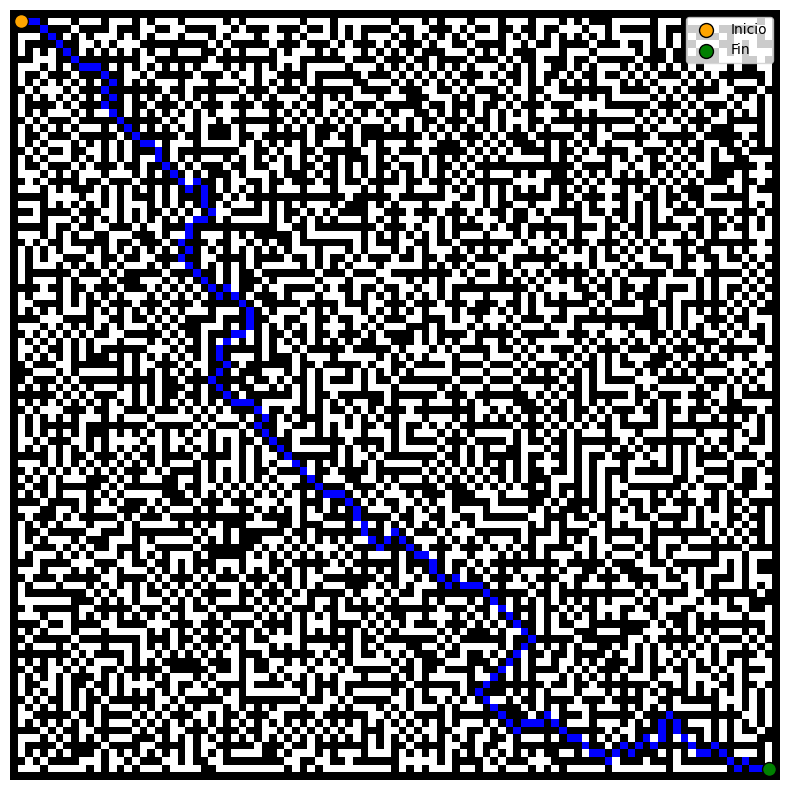

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import sys
from heapq import heappop, heappush

# Aumentar el límite de recursión
sys.setrecursionlimit(10**6)

# Dimensiones del laberinto
n = 101

# Crear el laberinto con paredes (1) y caminos (0)
maze = np.ones((n, n), dtype=int)

# Movimientos en las direcciones arriba, abajo, izquierda, derecha, y diagonales
movements = [(-2, 0), (2, 0), (0, -2), (0, 2), (-2, -2), (2, 2), (-2, 2), (2, -2)]

# Función para verificar si la celda está dentro del laberinto y es una pared
def is_valid(x, y):
    return 0 <= x < n and 0 <= y < n and maze[x, y] == 1

# Algoritmo de backtracking sin recursión para generar el laberinto
def generate_maze(x, y):
    stack = [(x, y)]
    maze[x, y] = 0

    while stack:
        x, y = stack[-1]
        random.shuffle(movements)
        moved = False

        for dx, dy in movements:
            nx, ny = x + dx, y + dy
            if is_valid(nx, ny):
                maze[x + dx // 2, y + dy // 2] = 0
                maze[nx, ny] = 0
                stack.append((nx, ny))
                moved = True
                break

        if not moved:
            stack.pop()

    # Agregar muros aleatorios adicionales dentro del laberinto
    for _ in range(int(n * n * 0.05)):  # 5% de muros adicionales
        rand_x, rand_y = random.randint(1, n - 2), random.randint(1, n - 2)
        maze[rand_x, rand_y] = 1

# Generar el laberinto
start_x, start_y = 1, 1
generate_maze(start_x, start_y)

# Posiciones de inicio y meta
start = (1, 1)
goal = (99, 99)

# Movimientos incluyendo diagonales para DFS
movements_dfs = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (1, 1), (-1, 1), (1, -1)]

# Función de búsqueda en profundidad con la heurística de la distancia de Manhattan
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

# Función de búsqueda en profundidad usando A* con prioridad al camino más corto
def dfs_shortest_path(x, y, goal, path, forget_rate=0.2):
    visited = set()
    priority_queue = []
    heappush(priority_queue, (0, x, y, []))  # prioridad, posición x, y, camino hasta ahora

    while priority_queue:
        _, cx, cy, current_path = heappop(priority_queue)

        if (cx, cy) == goal:
            path.extend(current_path + [(cx, cy)])
            return True

        if (cx, cy) in visited:
            continue

        visited.add((cx, cy))

        maze[cx, cy] = 2 if random.random() > forget_rate else 0

        for dx, dy in movements_dfs:
            nx, ny = cx + dx, cy + dy
            if (0 <= nx < n and 0 <= ny < n and maze[nx, ny] == 0) and (nx, ny) not in visited:
                heappush(priority_queue, (heuristic((nx, ny), goal), nx, ny, current_path + [(cx, cy)]))

    return False

# Inicializar el camino
path = []
dfs_shortest_path(start[0], start[1], goal, path)

# Marcar el camino encontrado en el laberinto
for (x, y) in path:
    maze[x, y] = 3

# Visualizar el laberinto y el camino
plt.figure(figsize=(10, 10))

# Crear un mapa de colores personalizado
color_map = np.ones((n, n, 3), dtype=float)
color_map[maze == 1] = [0, 0, 0]    # Paredes en negro
color_map[maze == 0] = [1, 1, 1]    # Caminos en blanco
color_map[maze == 3] = [0, 0, 1]    # Camino encontrado en azul

# Marcar el inicio y la meta
plt.imshow(color_map)
plt.scatter(start[1], start[0], c='orange', s=100, edgecolors='black', label="Inicio")
plt.scatter(goal[1], goal[0], c='green', s=100, edgecolors='black', label="Fin")
plt.legend(loc="upper right")
plt.axis("off")
plt.show()


### Explicación del código anterior

#### 1. Movimientos Diagonales

```python
movements = [(-2, 0), (2, 0), (0, -2), (0, 2), (-2, -2), (2, 2), (-2, 2), (2, -2)]
movements_dfs = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (1, 1), (-1, 1), (1, -1)]
```

- Se agregaron movimientos en diagonal tanto para la generación del laberinto como para la búsqueda.
- Esto aumenta la complejidad y variedad del laberinto y permite caminos más variados durante la exploración.

#### 2. Muros Aleatorios Adicionales

```python
for _ in range(int(n * n * 0.05)):  # 5% de muros adicionales
    rand_x, rand_y = random.randint(1, n - 2), random.randint(1, n - 2)
    maze[rand_x, rand_y] = 1
```

- Después de la generación básica del laberinto, se agregan muros en ubicaciones aleatorias (5% de celdas) para incrementar la dificultad de la búsqueda.
- Los muros se agregan dentro de los límites del laberinto, excluyendo el borde.

#### 3. Uso del Algoritmo A* (Prioridad al Camino Más Corto)

```python
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])
```

- Para encontrar el camino más corto, se implementó la **distancia de Manhattan** como heurística de la prioridad.
- Esta función mide la distancia entre dos puntos `(a, b)`, ayudando al algoritmo a priorizar caminos que se acerquen más rápido al objetivo.

#### 4. Búsqueda en Profundidad Modificada con Prioridad y Olvido

```python
def dfs_shortest_path(x, y, goal, path, forget_rate=0.2):
    visited = set()
    priority_queue = []
    heappush(priority_queue, (0, x, y, []))

    while priority_queue:
        _, cx, cy, current_path = heappop(priority_queue)

        if (cx, cy) == goal:
            path.extend(current_path + [(cx, cy)])
            return True

        if (cx, cy) in visited:
            continue

        visited.add((cx, cy))

        maze[cx, cy] = 2 if random.random() > forget_rate else 0
```

- **Cola de Prioridad**: Para hacer la búsqueda en profundidad recursiva con prioridad, usamos una cola de prioridad que selecciona la próxima celda con el menor costo (la más cercana a la meta).
- **"Olvido"**: Al marcar el camino, cada celda tiene un `20%` de probabilidad (`forget_rate`) de desmarcarse. Esto imita un "olvido", haciendo que el algoritmo omita o "olvide" por dónde ha pasado, creando un efecto visual de exploración sin garantía de la ruta.
  
Estos cambios permiten una exploración más inteligente del laberinto con una visualización adaptada a caminos más largos y menos predecibles.

# **1.5 Recorrido en abanico iterativo, indica estructuras creadas.**

### **1.5.1 Abanico iterativo sin diagonales**

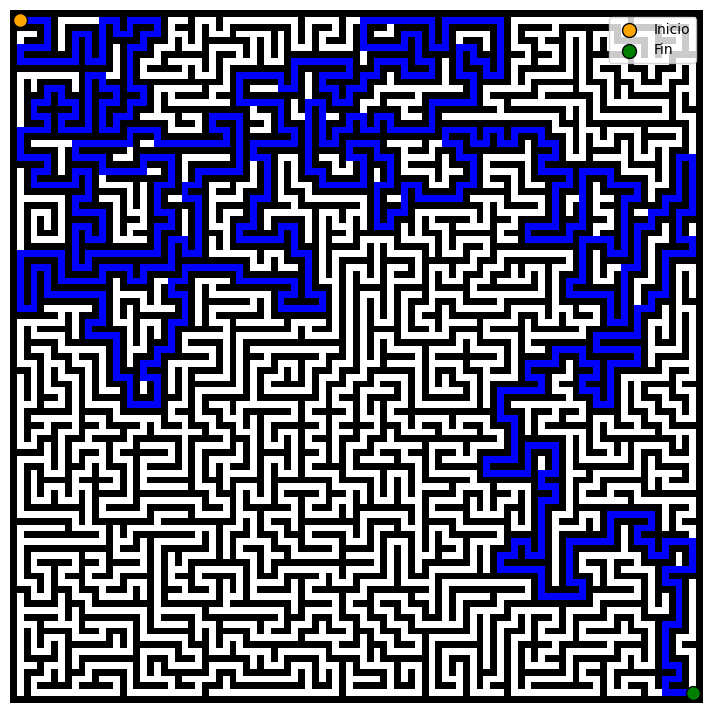

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import sys

# Aumentar el límite de recursión
sys.setrecursionlimit(10**6)

# Dimensiones del laberinto
n = 101  # Tamaño del laberinto (101x101)

# Crear el laberinto con paredes (1) y caminos (0)
maze = np.ones((n, n), dtype=int)

# Movimiento en las direcciones arriba, abajo, izquierda, derecha
movements = [(-2, 0), (2, 0), (0, -2), (0, 2)]

# Función para verificar si la celda está dentro del laberinto y es una pared
def is_valid(x, y):
    return 0 <= x < n and 0 <= y < n and maze[x, y] == 1

# Algoritmo de backtracking sin recursión para generar el laberinto
def generate_maze(x, y):
    # Crear una pila y añadir la celda inicial
    stack = [(x, y)]
    maze[x, y] = 0  # Marcar la celda inicial como camino

    while stack:
        # Obtener la posición actual
        x, y = stack[-1]

        # Mezclar direcciones para un laberinto aleatorio
        random.shuffle(movements)
        moved = False

        for dx, dy in movements:
            nx, ny = x + dx, y + dy
            # Comprobar si el próximo movimiento es válido
            if is_valid(nx, ny):
                # Romper la pared intermedia
                maze[x + dx // 2, y + dy // 2] = 0
                # Marcar la nueva celda como camino y añadirla a la pila
                maze[nx, ny] = 0
                stack.append((nx, ny))
                moved = True
                break

        # Si no hay movimientos posibles, retroceder en la pila
        if not moved:
            stack.pop()

# Inicializar el laberinto en una posición de inicio
start_x, start_y = 1, 1
generate_maze(start_x, start_y)

# Posiciones de inicio y fin
start = (1, 1)
goal = (99, 99)

# Movimientos en las direcciones arriba, abajo, izquierda, derecha
movements_dfs = [(-1, 0), (1, 0), (0, -1), (0, 1)]

# Función de búsqueda en abanico iterativa (DFS iterativo)
def dfs_iterative(x, y, goal, path):
    stack = [(x, y, [])]  # Pila para almacenar las posiciones y el camino
    visited = set()       # Conjunto para registrar las celdas visitadas

    while stack:
        cx, cy, current_path = stack.pop()

        # Si hemos llegado a la meta, añadir el camino final y salir
        if (cx, cy) == goal:
            path.extend(current_path + [(cx, cy)])
            return True

        # Si ya hemos visitado esta celda, continuar
        if (cx, cy) in visited:
            continue

        # Marcar la celda como visitada y como camino recorrido
        visited.add((cx, cy))
        maze[cx, cy] = 2  # Camino recorrido

        # Agregar movimientos en abanico (en orden aleatorio para explorar caminos variados)
        random.shuffle(movements_dfs)
        for dx, dy in movements_dfs:
            nx, ny = cx + dx, cy + dy
            # Comprobar si el movimiento es válido y la celda aún no visitada
            if (0 <= nx < n and 0 <= ny < n and maze[nx, ny] == 0) and (nx, ny) not in visited:
                stack.append((nx, ny, current_path + [(cx, cy)]))  # Añadir nuevo camino a la pila

    return False  # Si no encontramos el camino, retornamos False

# Inicializar el camino
path = []
dfs_iterative(start[0], start[1], goal, path)

# Marcar el camino encontrado en el laberinto
for (x, y) in path:
    maze[x, y] = 3  # Marcar el camino encontrado en azul

# Visualizar el laberinto y el camino
plt.figure(figsize=(9, 9))

# Crear un mapa de colores personalizado
color_map = np.ones((n, n, 3), dtype=float)  # Crear un mapa RGB
color_map[maze == 1] = [0, 0, 0]    # Paredes en negro
color_map[maze == 0] = [1, 1, 1]    # Caminos en blanco
color_map[maze == 3] = [0, 0, 1]    # Camino encontrado en azul

# Mostrar el laberinto
plt.imshow(color_map)
plt.axis("off")

# Marcar el punto de inicio en naranja y el punto de fin en verde
plt.scatter(start[1], start[0], c='orange', s=100, edgecolors='black', label="Inicio")  # Inicio
plt.scatter(goal[1], goal[0], c='green', s=100, edgecolors='black', label="Fin")  # Fin

plt.legend(loc="upper right")
plt.show()


Este código genera un laberinto aleatorio y luego encuentra un camino desde una posición de inicio hasta una meta mediante una búsqueda en abanico iterativa, utilizando una pila para simular una búsqueda en profundidad. A continuación, explico cada sección:

### 1. Configuración Inicial y Generación del Laberinto

```python
import random
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.setrecursionlimit(10**6)
n = 101  # Dimensiones del laberinto

maze = np.ones((n, n), dtype=int)  # Crear una matriz de 101x101, inicialmente llena de paredes (1)
```

- **Límite de recursión**: Aumenta el límite de recursión para evitar problemas de stack overflow cuando se generan caminos largos.
- **Tamaño `n`**: El laberinto es de 101x101, con un valor inicial de 1 en cada celda, representando paredes.

#### Movimientos de Generación

```python
movements = [(-2, 0), (2, 0), (0, -2), (0, 2)]
```

Estos movimientos permiten que el laberinto avance en pasos de dos celdas, lo que facilita la creación de un camino continuo al "romper" una pared en la dirección deseada.

### 2. Función `generate_maze`: Generación del Laberinto

```python
def generate_maze(x, y):
    stack = [(x, y)]
    maze[x, y] = 0  # Marcar la celda inicial como camino

    while stack:
        x, y = stack[-1]
        random.shuffle(movements)  # Mezcla las direcciones para hacer el laberinto aleatorio
        moved = False

        for dx, dy in movements:
            nx, ny = x + dx, y + dy
            if is_valid(nx, ny):
                maze[x + dx // 2, y + dy // 2] = 0  # Romper la pared intermedia
                maze[nx, ny] = 0  # Marcar la nueva celda como camino
                stack.append((nx, ny))  # Añadir la nueva posición a la pila
                moved = True
                break

        if not moved:
            stack.pop()  # Retrocede si no hay movimientos válidos
```

- **Validación de movimiento**: `is_valid` asegura que la celda de destino esté dentro del laberinto y sea una pared.
- **Generación aleatoria**: Cada celda tiene cuatro direcciones posibles y se exploran en un orden aleatorio, generando caminos aleatorios en el laberinto.
- **Retroceso**: Si una celda no tiene movimientos válidos, se retrocede quitando la última posición de la pila, simulando un retroceso (backtracking).

### 3. Función `dfs_iterative`: Búsqueda en Abanico Iterativa para Encontrar el Camino

```python
movements_dfs = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Movimientos básicos en 4 direcciones

def dfs_iterative(x, y, goal, path):
    stack = [(x, y, [])]  # Inicializa una pila con la posición de inicio
    visited = set()  # Conjunto para evitar celdas visitadas repetidamente

    while stack:
        cx, cy, current_path = stack.pop()

        # Si llegamos a la meta, almacenamos el camino y terminamos
        if (cx, cy) == goal:
            path.extend(current_path + [(cx, cy)])
            return True

        if (cx, cy) in visited:
            continue  # Evita re-explorar celdas visitadas

        visited.add((cx, cy))  # Marca la celda como visitada
        maze[cx, cy] = 2  # Indica que hemos pasado por esta celda

        # Movimientos en abanico en 4 direcciones
        random.shuffle(movements_dfs)  # Direcciones en orden aleatorio
        for dx, dy in movements_dfs:
            nx, ny = cx + dx, cy + dy
            if (0 <= nx < n and 0 <= ny < n and maze[nx, ny] == 0) and (nx, ny) not in visited:
                stack.append((nx, ny, current_path + [(cx, cy)]))  # Agrega la celda a la pila para continuar

    return False  # Si no encuentra el objetivo, retorna False
```

- **Pila `stack`**: Almacena la posición actual `(cx, cy)` y el camino acumulado `current_path`.
- **Conjunto `visited`**: Evita que la función explore celdas ya visitadas, optimizando la búsqueda.
- **Exploración en abanico**: Usa `random.shuffle` para explorar direcciones en orden aleatorio en cada nivel, lo que genera una búsqueda en abanico con caminos variados.
- **Meta alcanzada**: Si se llega a la meta, se guarda el camino recorrido en `path` y termina la función.

### 4. Visualización del Laberinto y del Camino

```python
plt.figure(figsize=(9, 9))

color_map = np.ones((n, n, 3), dtype=float)  # Crear un mapa RGB
color_map[maze == 1] = [0, 0, 0]    # Paredes en negro
color_map[maze == 0] = [1, 1, 1]    # Caminos en blanco
color_map[maze == 3] = [0, 0, 1]    # Camino encontrado en azul

plt.imshow(color_map)
plt.axis("off")

# Inicio y fin
plt.scatter(start[1], start[0], c='orange', s=100, edgecolors='black', label="Inicio")
plt.scatter(goal[1], goal[0], c='green', s=100, edgecolors='black', label="Fin")

plt.legend(loc="upper right")
plt.show()
```

- **Color del camino**: Después de que `dfs_iterative` completa el recorrido, se marcan las posiciones del `path` con el valor `3` para indicar el camino encontrado.
- **Color map**: Muestra las paredes en negro, caminos en blanco, y el camino correcto en azul. El punto de inicio es naranja y el final es verde.

Este enfoque muestra cómo el laberinto generado es explorado en abanico, y una vez completado, se visualiza el camino correcto desde el inicio hasta la meta en una visualización clara.

### **1.5.2 Abanico iterativo con movimientos diagonales**

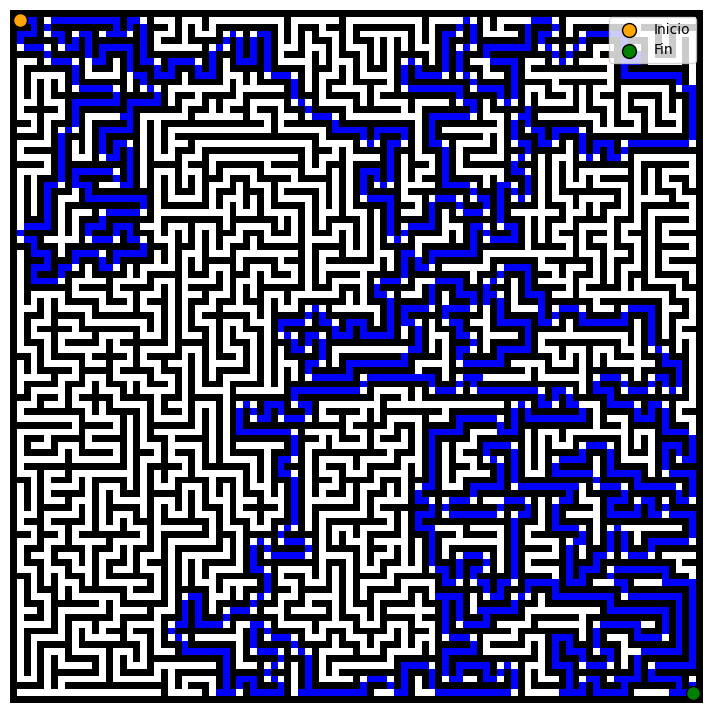

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import sys

# Aumentar el límite de recursión
sys.setrecursionlimit(10**6)

# Dimensiones del laberinto
n = 101  # Tamaño del laberinto (101x101)

# Crear el laberinto con paredes (1) y caminos (0)
maze = np.ones((n, n), dtype=int)

# Movimiento en las direcciones arriba, abajo, izquierda, derecha
movements = [(-2, 0), (2, 0), (0, -2), (0, 2)]

# Función para verificar si la celda está dentro del laberinto y es una pared
def is_valid(x, y):
    return 0 <= x < n and 0 <= y < n and maze[x, y] == 1

# Algoritmo de backtracking sin recursión para generar el laberinto
def generate_maze(x, y):
    # Crear una pila y añadir la celda inicial
    stack = [(x, y)]
    maze[x, y] = 0  # Marcar la celda inicial como camino

    while stack:
        # Obtener la posición actual
        x, y = stack[-1]

        # Mezclar direcciones para un laberinto aleatorio
        random.shuffle(movements)
        moved = False

        for dx, dy in movements:
            nx, ny = x + dx, y + dy
            # Comprobar si el próximo movimiento es válido
            if is_valid(nx, ny):
                # Romper la pared intermedia
                maze[x + dx // 2, y + dy // 2] = 0
                # Marcar la nueva celda como camino y añadirla a la pila
                maze[nx, ny] = 0
                stack.append((nx, ny))
                moved = True
                break

        # Si no hay movimientos posibles, retroceder en la pila
        if not moved:
            stack.pop()

# Inicializar el laberinto en una posición de inicio
start_x, start_y = 1, 1
generate_maze(start_x, start_y)

# Posiciones de inicio y fin
start = (1, 1)
goal = (99, 99)

# Movimientos en las direcciones arriba, abajo, izquierda, derecha
movements_dfs = [(1, 1), (1, -1), (-1, 1), (-1, -1), (-1, 0), (1, 0), (0, -1), (0, 1)]

# Función de búsqueda en abanico iterativa (DFS iterativo)
def dfs_iterative(x, y, goal, path):
    stack = [(x, y, [])]  # Pila para almacenar las posiciones y el camino
    visited = set()       # Conjunto para registrar las celdas visitadas

    while stack:
        cx, cy, current_path = stack.pop()

        # Si hemos llegado a la meta, añadir el camino final y salir
        if (cx, cy) == goal:
            path.extend(current_path + [(cx, cy)])
            return True

        # Si ya hemos visitado esta celda, continuar
        if (cx, cy) in visited:
            continue

        # Marcar la celda como visitada y como camino recorrido
        visited.add((cx, cy))
        maze[cx, cy] = 2  # Camino recorrido

        # Agregar movimientos en abanico (en orden aleatorio para explorar caminos variados)
        random.shuffle(movements_dfs)
        for dx, dy in movements_dfs:
            nx, ny = cx + dx, cy + dy
            # Comprobar si el movimiento es válido y la celda aún no visitada
            if (0 <= nx < n and 0 <= ny < n and maze[nx, ny] == 0) and (nx, ny) not in visited:
                stack.append((nx, ny, current_path + [(cx, cy)]))  # Añadir nuevo camino a la pila

    return False  # Si no encontramos el camino, retornamos False

# Inicializar el camino
path = []
dfs_iterative(start[0], start[1], goal, path)

# Marcar el camino encontrado en el laberinto
for (x, y) in path:
    maze[x, y] = 3  # Marcar el camino encontrado en azul

# Visualizar el laberinto y el camino
plt.figure(figsize=(9, 9))

# Crear un mapa de colores personalizado
color_map = np.ones((n, n, 3), dtype=float)  # Crear un mapa RGB
color_map[maze == 1] = [0, 0, 0]    # Paredes en negro
color_map[maze == 0] = [1, 1, 1]    # Caminos en blanco
color_map[maze == 3] = [0, 0, 1]    # Camino encontrado en azul

# Mostrar el laberinto
plt.imshow(color_map)
plt.axis("off")

# Marcar el punto de inicio en naranja y el punto de fin en verde
plt.scatter(start[1], start[0], c='orange', s=100, edgecolors='black', label="Inicio")  # Inicio
plt.scatter(goal[1], goal[0], c='green', s=100, edgecolors='black', label="Fin")  # Fin

plt.legend(loc="upper right")
plt.show()


Este código genera un laberinto y luego utiliza una búsqueda en abanico iterativa (DFS) para encontrar un camino desde el inicio hasta la meta, permitiendo movimientos diagonales. La única diferencia que tiene con el ejercicio anterior es que incluimos más movimientos, para que se pueda desplazar en diagonal:

### Movimientos Diagonales

```python
movements_dfs = [(1, 1), (1, -1), (-1, 1), (-1, -1), (-1, 0), (1, 0), (0, -1), (0, 1)]
```

- En la búsqueda en abanico, los movimientos incluyen desplazamientos diagonales, además de los movimientos básicos (arriba, abajo, izquierda, derecha), para permitir una exploración más amplia de caminos.

# **1.6 Comparación de los dos algoritmos, dificultades, conclusiones y mejoras (camino más corto).**

Comparación detallada entre ambos algoritmos, sus dificultades, conclusiones y posibles mejoras orientadas a encontrar el camino más corto:

### Comparación de los Algoritmos

1. **Recorrido en Profundidad (DFS recursivo)**
   - **Implementación**: Este enfoque usa una función recursiva para explorar el laberinto, siguiendo un camino hasta que llega al objetivo o se encuentra en un callejón sin salida, momento en el cual retrocede y prueba otros caminos.
   - **Estructura de Datos**: La pila de recursión actúa como un contenedor de los puntos visitados, simulando el "retroceso" al no encontrar el objetivo en cada bifurcación.
   - **Ventajas**:
     - Genera caminos largos y variados, ideal para laberintos que buscan presentar un reto sin un enfoque en la eficiencia de los recorridos.
     - Sencillo de implementar y visualizar en laberintos grandes.
   - **Desventajas**:
     - El alto uso de la pila de recursión puede ser problemático en laberintos grandes, ya que podría agotar el límite de recursión y consumir mucha memoria.
     - No siempre encuentra el camino más corto, ya que explora en profundidad antes de considerar otras opciones.

2. **Recorrido en Abanico (DFS iterativo)**
   - **Implementación**: Usa una pila explícita para almacenar caminos posibles y se enfoca en explorar caminos en todas las direcciones, añadiendo aleatoriedad para generar un recorrido en abanico.
   - **Estructura de Datos**: Emplea una pila que permite realizar movimientos "en abanico", visitando nodos vecinos sin necesidad de una pila recursiva.
   - **Ventajas**:
     - Ahorra memoria al evitar recursión, lo que facilita la ejecución en sistemas con menor capacidad.
     - Permite mayor control sobre el orden de visita de los nodos, y puede ser optimizado para adaptarse a las necesidades del laberinto.
   - **Desventajas**:
     - Como el DFS recursivo, no es el mejor para encontrar caminos cortos ya que no prioriza el objetivo.
     - La aleatoriedad en el abanico puede generar caminos redundantes, alargando el recorrido sin una ganancia en eficiencia.

### Dificultades y Conclusiones

- **Dificultades de ambos enfoques**: Los dos algoritmos están orientados a la exploración completa de caminos, lo cual hace que generen soluciones largas y a menudo no optimizadas. Esto se debe a que el DFS (en ambos casos) no realiza una búsqueda "inteligente" que priorice el camino más corto, sino que intenta exhaustivamente cada ruta disponible. Ambos pueden consumir bastantes recursos de memoria y procesamiento, especialmente en laberintos grandes.

- **Conclusiones sobre su rendimiento**: Ambos algoritmos cumplen su función de generar y recorrer laberintos, pero ninguno es ideal para la eficiencia en términos de longitud del camino. En laberintos donde el camino más corto es esencial, estos algoritmos tienen limitaciones notables.

### Mejoras para Encontrar el Camino Más Corto

Para mejorar estos algoritmos y buscar el camino más corto, es recomendable implementar **algoritmos heurísticos** o de **búsqueda por niveles** como BFS o A*:

1. **Algoritmo de Búsqueda en Anchura (BFS)**: Este algoritmo explora cada nivel del laberinto de manera completa antes de pasar al siguiente nivel. Es ideal para encontrar el camino más corto en laberintos sin pesos, ya que garantiza la ruta más rápida entre el inicio y el objetivo.
   
2. **Algoritmo A***: Este algoritmo utiliza una función heurística que estima la distancia hasta el objetivo, optimizando los movimientos hacia la meta y reduciendo el tiempo de búsqueda. A* sería ideal en laberintos grandes, donde conocer el camino más corto es una prioridad, y permite asignar "costos" específicos para cada celda, si fuera necesario.

### Implementación de A* en el Laberinto Actual

Implementar A* en el laberinto implica agregar una función de heurística, como **la distancia de Manhattan,** y una estructura de datos como una cola de prioridad para ordenar los nodos según el costo total estimado (g + h). La heurística ayuda al algoritmo a dirigirse hacia la meta de manera más eficiente, reduciendo los recorridos innecesarios.

### Código Implementación de A*


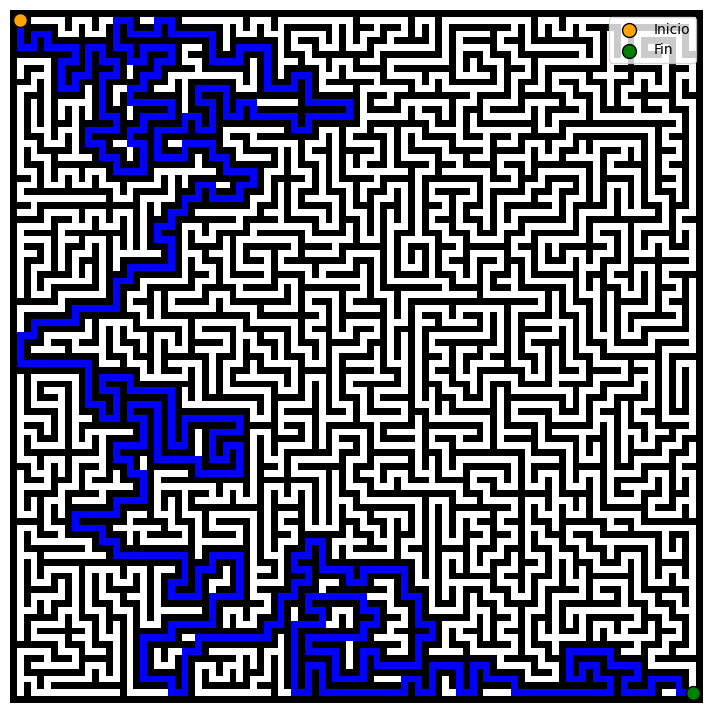

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
import heapq

# Dimensiones del laberinto
n = 101

# Crear el laberinto con paredes (1) y caminos (0)
maze = np.ones((n, n), dtype=int)

# Movimiento en las direcciones arriba, abajo, izquierda, derecha
movements = [(-2, 0), (2, 0), (0, -2), (0, 2)]

# Función para verificar si la celda está dentro del laberinto y es una pared
def is_valid(x, y):
    return 0 <= x < n and 0 <= y < n and maze[x, y] == 1

# Algoritmo de backtracking sin recursión para generar el laberinto
def generate_maze(x, y):
    stack = [(x, y)]
    maze[x, y] = 0  # Marcar la celda inicial como camino

    while stack:
        x, y = stack[-1]
        random.shuffle(movements)
        moved = False

        for dx, dy in movements:
            nx, ny = x + dx, y + dy
            if is_valid(nx, ny):
                maze[x + dx // 2, y + dy // 2] = 0
                maze[nx, ny] = 0
                stack.append((nx, ny))
                moved = True
                break
        if not moved:
            stack.pop()

# Generar el laberinto
start_x, start_y = 1, 1
generate_maze(start_x, start_y)

# Posiciones de inicio y fin
start = (1, 1)
goal = (99, 99)

# Función heurística (distancia de Manhattan)
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

# Implementación del algoritmo A*
def a_star(maze, start, goal):
    open_set = []
    heapq.heappush(open_set, (0, start))  # Prioridad (costo), posición
    came_from = {}  # Almacena el nodo previo en el camino óptimo
    g_score = {start: 0}  # Coste del camino desde el inicio hasta cada nodo
    f_score = {start: heuristic(start, goal)}

    while open_set:
        current = heapq.heappop(open_set)[1]

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path

        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            neighbor = (current[0] + dx, current[1] + dy)
            if 0 <= neighbor[0] < n and 0 <= neighbor[1] < n and maze[neighbor] == 0:
                tentative_g_score = g_score[current] + 1
                if tentative_g_score < g_score.get(neighbor, float('inf')):
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                    heapq.heappush(open_set, (f_score[neighbor], neighbor))
    return None

# Encontrar el camino con A*
path = a_star(maze, start, goal)

# Marcar el camino encontrado en el laberinto
if path:
    for (x, y) in path:
        maze[x, y] = 3  # Marcar el camino encontrado en azul

# Visualizar el laberinto y el camino
plt.figure(figsize=(9, 9))

# Crear un mapa de colores personalizado
color_map = np.ones((n, n, 3), dtype=float)
color_map[maze == 1] = [0, 0, 0]    # Paredes en negro
color_map[maze == 0] = [1, 1, 1]    # Caminos en blanco
color_map[maze == 3] = [0, 0, 1]    # Camino encontrado en azul

plt.imshow(color_map)
plt.axis("off")

# Marcar el punto de inicio en naranja y el punto de fin en verde
plt.scatter(start[1], start[0], c='orange', s=100, edgecolors='black', label="Inicio")
plt.scatter(goal[1], goal[0], c='green', s=100, edgecolors='black', label="Fin")

plt.legend(loc="upper right")
plt.show()


### Explicación del Código

1. **Función Heurística**
   - `heuristic(a, b)`: Calcula la **distancia de Manhattan** entre dos puntos `a` y `b`, que es la suma de las distancias horizontales y verticales. Esto guía al algoritmo hacia la meta.

2. **Implementación de A***
   - `open_set`: Una lista de prioridad que utiliza `heapq` para almacenar las celdas según su estimación de costo `f_score`.
   - `came_from`: Un diccionario que almacena el nodo anterior de cada celda en el camino más corto. Esto permite reconstruir el camino al alcanzar la meta.
   - `g_score` y `f_score`: `g_score` mantiene el costo real del camino desde el inicio hasta cada celda, mientras que `f_score` es el costo estimado total usando la heurística.
   
3. **Algoritmo Principal**
   - Mientras haya celdas en `open_set`, el algoritmo selecciona la celda con el menor `f_score`, que es la más prometedora en acercarse a la meta.
   - Para cada vecino válido y transitable:
     - Calcula un `tentative_g_score` (costo provisional) y, si es mejor que el actual, actualiza el nodo `neighbor` en `came_from`, `g_score`, y `f_score`.
     - Luego, añade `neighbor` a `open_set`.
   - Cuando se alcanza la meta, se reconstruye el camino óptimo desde `came_from` y se devuelve.


### Conclusión

El algoritmo A* ofrece una solución eficiente para encontrar el camino más corto en un laberinto. La heurística de Manhattan permite que el algoritmo se enfoque en la meta, evitando caminos innecesarios y mejorando el rendimiento en comparación con DFS.